# Versuch 2: Radioaktivität

(@everyone: please only write in the respective notebook that you are assigned to, to avoid merge conflicts)
(I will then put everything in a collective notebook for the advisors)

In [1]:
# I would recommend to get yourself the uncertainties package, otherwise you can comment all of this out
# https://pythonhosted.org/uncertainties/
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1. Messung der Geigerzähler-Charakteristik

Zählrate (unkorrigiert von HGS!) gegen Spannung auftragen |
Zählraten-Fehler irrelevant hier, da es nur um die Identifikation des Plateubereichs geht


jeweils 3x Messungen für 15 Sekunden - nehme Mittelwer |
erst ab 750V wurde etwas gemessen (daher die anderen Daten trivial) |
Zählrate wurde bei 1/min belassen

In [3]:
# x data
voltage = np.array([0,100,200,300,400,500,600,700,750,800,850,900,950,1000,1050,1100,1150,1200]) #volt
# y data
# averaging over 3 data points and their errors!
number_decacy_per_minute = np.array([ufloat(0,0),ufloat(0,0),ufloat(0,0),ufloat(0,0),
                                    ufloat(0,0),ufloat(0,0),ufloat(0,0),ufloat(0,0),
                                    np.mean([ufloat(8,np.sqrt(8)),ufloat(760,np.sqrt(760)),ufloat(1608,np.sqrt(1608))]),
                                    np.mean([ufloat(2788,np.sqrt(2788)),ufloat(2960,np.sqrt(2960)),ufloat(2788,np.sqrt(2788))]),
                                    np.mean([ufloat(2656,np.sqrt(2656)),ufloat(2680,np.sqrt(2680)),ufloat(2680,np.sqrt(2680))]),
                                    np.mean([ufloat(2852,np.sqrt(2852)),ufloat(2720,np.sqrt(2720)),ufloat(2868,np.sqrt(2868))]),
                                    np.mean([ufloat(3092,np.sqrt(3092)),ufloat(2984,np.sqrt(2984)),ufloat(3120,np.sqrt(3120))]),
                                    np.mean([ufloat(3116,np.sqrt(3116)),ufloat(3016,np.sqrt(3016)),ufloat(3060,np.sqrt(3060))]),
                                    np.mean([ufloat(3176,np.sqrt(3176)),ufloat(3188,np.sqrt(3188)),ufloat(3136,np.sqrt(3136))]),
                                    np.mean([ufloat(3372,np.sqrt(3372)),ufloat(3224,np.sqrt(3224)),ufloat(3088,np.sqrt(3088))]),
                                    np.mean([ufloat(3332,np.sqrt(3332)),ufloat(3212,np.sqrt(3212)),ufloat(3236,np.sqrt(3236))]),
                                    np.mean([ufloat(3316,np.sqrt(3316)),ufloat(3296,np.sqrt(3296)),ufloat(3428,np.sqrt(3428))]),
                                    ])

In [4]:
# averaging over 3 data points and their errors!
#number_decays_per_minute_mean = np.array([0,0,0,0,0,0,0,0,np.mean([8,760,1608]), 
#                                     np.mean([2788,2960,2788]),np.mean([2656,2680,2904]),
#                                         np.mean([2852,2720,2868]),np.mean([3092,2984,3120]),
#                                         np.mean([3116,3016,3060]),np.mean([3176,3188,3136]),
#                                         np.mean([3372,3224,3088]),np.mean([3332,3212,3236]),
#                                         np.mean([3316,3296,3428])])

In [5]:
number_decacy_per_minute_mean_ufloat = np.zeros(len(number_decacy_per_minute))
number_decacy_per_minute_er_ufloat = np.zeros(len(number_decacy_per_minute))
for i in range(len(number_decacy_per_minute)):
    number_decacy_per_minute_mean_ufloat[i] = number_decacy_per_minute[i].n
for i in range(len(number_decacy_per_minute)):
    number_decacy_per_minute_er_ufloat[i] = number_decacy_per_minute[i].s

In [6]:
data = pd.DataFrame({"Spannung / V": voltage, "Zählrate / min$^{-1}$": number_decacy_per_minute_mean_ufloat, "Zählrate-Fehler / min$^{-1/2}$": number_decacy_per_minute_er_ufloat})
data

,Spannung / V,Zählrate / min$^{-1}$,Zählrate-Fehler / min$^{-1/2}$
0,0,0.000000,0.000000
1,100,0.000000,0.000000
2,200,0.000000,0.000000
3,300,0.000000,0.000000
4,400,0.000000,0.000000
5,500,0.000000,0.000000
6,600,0.000000,0.000000
7,700,0.000000,0.000000
8,750,792.000000,16.248077
9,800,2845.333333,30.796825


In [7]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [8]:
print(sns.color_palette("pastel").as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


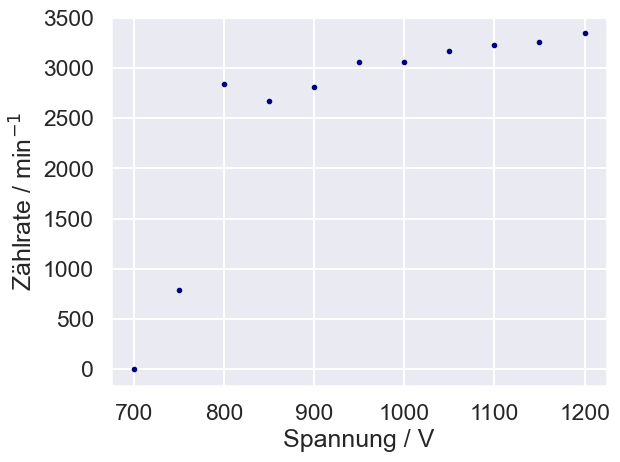

In [9]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("Spannung / V")
plt.ylabel( "Zählrate / min$^{-1}$")
plt.errorbar(x=voltage[7:], 
             y=number_decacy_per_minute_mean_ufloat[7:],markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue")

plt.savefig("Geigerzähler_Charakteristik.png", dpi = 500,bbox_inches='tight')
plt.show()

### 2.3. Halbwertszeit von Barium 137

In [10]:
# read in data
# first and last value are not needed
raw_data_3 = pd.read_csv("Gruppe1_SS23/Messung3/Messung3_Barium", skiprows=5,skipfooter=1,delim_whitespace=True, 
                         names=["time / ms", "counting rate / min$^{-1}$"], header=None,encoding='latin-1')

raw_data_3

/var/folders/vd/1vfn276n33s78rfpf3bb9h300000gn/T/ipykernel_1203/2475107882.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  raw_data_3 = pd.read_csv("Gruppe1_SS23/Messung3/Messung3_Barium", skiprows=5,skipfooter=1,delim_whitespace=True,


,time / ms,counting rate / min$^{-1}$
0,15124,816
1,30262,876
2,45385,840
3,60502,696
4,75530,716
5,90647,632
6,105776,580
7,120910,604
8,136037,528
9,151162,548


#### without HGS correction

In [11]:
# manipulating the data
data_without_hgs_correction = pd.DataFrame()
data_without_hgs_correction["time / s"] = raw_data_3["time / ms"]/1000
data_without_hgs_correction["counting rate / s$^{-1}$"] = raw_data_3["counting rate / min$^{-1}$"]/60

# assuming poisson distribution

data_without_hgs_correction["counting rate error / s$^{-1}$"] = np.sqrt(data_without_hgs_correction["counting rate / s$^{-1}$"] * 15)/15
# include actual time steps
for i in range(len(data_without_hgs_correction["counting rate error / s$^{-1}$"])):
    if i == 0:
        time_step = data_without_hgs_correction["time / s"][i]
    else:
        time_step = data_without_hgs_correction["time / s"][i] - data_without_hgs_correction["time / s"][i-1]
    data_without_hgs_correction["counting rate error / s$^{-1}$"][i] = np.sqrt(data_without_hgs_correction["counting rate / s$^{-1}$"][i] * time_step)/time_step

# for analysis we need the logarithm of the counting rate

data_without_hgs_correction["log(counting rate) / s$^{-1}$"] = np.log(data_without_hgs_correction["counting rate / s$^{-1}$"])
#error of logarithmic value is simply given as:
data_without_hgs_correction["log(counting rate error) / s$^{-1}$"] = data_without_hgs_correction["counting rate error / s$^{-1}$"]/data_without_hgs_correction["counting rate / s$^{-1}$"]

In [12]:
data_without_hgs_correction

,time / s,counting rate / s$^{-1}$,counting rate error / s$^{-1}$,log(counting rate) / s$^{-1}$,log(counting rate error) / s$^{-1}$
0,15.124,13.600000,0.948279,2.610070,0.069726
1,30.262,14.600000,0.982069,2.681022,0.067265
2,45.385,14.000000,0.962155,2.639057,0.068725
3,60.502,11.600000,0.875984,2.451005,0.075516
4,75.530,11.933333,0.891108,2.479336,0.074674
5,90.647,10.533333,0.834738,2.354545,0.079247
6,105.776,9.666667,0.799343,2.268684,0.082691
7,120.910,10.066667,0.815579,2.309230,0.081018
8,136.037,8.800000,0.762720,2.174752,0.086673
9,151.162,9.133333,0.777082,2.211931,0.085082


$\ln{\left(A(t) \right)} = \ln{\left(A_0 \right)} - \lambda t$

In [13]:
import scipy.optimize
def fit_function(t,ln_a_0,decay_rate):
    return ln_a_0 - decay_rate*t

In [14]:
p_opt, p_var = scipy.optimize.curve_fit(fit_function, data_without_hgs_correction["time / s"],
                                        data_without_hgs_correction["log(counting rate) / s$^{-1}$"])
print("ln(A_0) =",p_opt[0],"+/-",np.sqrt(p_var[0][0]))
print("lambda =",p_opt[1],"+/-",np.sqrt(p_var[1][1]))
decay_rate_determined = ufloat(p_opt[1], np.sqrt(p_var[1][1]))

ln(A_0) = 2.692051367590735 +/- 0.047270929416509136
lambda = 0.0038191018257371858 +/- 0.00012974942558427265


In [15]:
half_time = np.log(2)/decay_rate_determined
half_time

181.49481532248748+/-6.166069696261858

In [16]:
#in minues
half_time/60

3.0249135887081247+/-0.10276782827103097

this is the error of the fit, but there is also error of the measurements!

Update: can be done simply with curve fit from scipy (see below when doing the actual calculation)

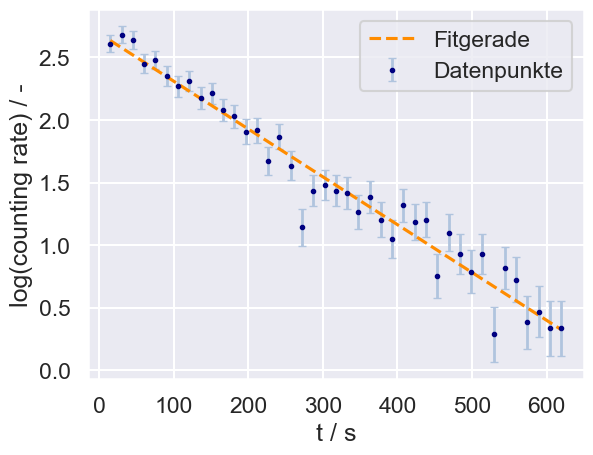

In [17]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("t / s")
plt.ylabel( "log(counting rate) / -")
plt.errorbar(x=data_without_hgs_correction["time / s"] , 
             y=data_without_hgs_correction["log(counting rate) / s$^{-1}$"] , 
             yerr=data_without_hgs_correction["log(counting rate error) / s$^{-1}$"],markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.plot(data_without_hgs_correction["time / s"], 
         fit_function(data_without_hgs_correction["time / s"],p_opt[0],p_opt[1]), "--", color="darkorange", label="Fitgerade")
plt.legend()
#plt.savefig()
plt.show()

#### with HGS correction

In [18]:
hgs_data = pd.read_csv("Gruppe1_SS23/Messung2/Messung2_Daten.csv", skiprows=2, 
                       names=["Time / ms", "Events / per minute"], header=None)
hgs_data["Time / s"] = hgs_data["Time / ms"]/1000
hgs_data["Events / per second"] = hgs_data["Events / per minute"]/60
hgs_data

,Time / ms,Events / per minute,Time / s,Events / per second
0,15122,56,15.122,0.933333
1,30146,36,30.146,0.600000
2,45274,56,45.274,0.933333
3,60398,76,60.398,1.266667
4,75521,32,75.521,0.533333
5,90637,32,90.637,0.533333
6,105677,28,105.677,0.466667
7,120800,36,120.800,0.600000
8,135922,56,135.922,0.933333
9,151047,24,151.047,0.400000


In [19]:
#assuming Poisson distribution
sum_events=0
for i in range(len(hgs_data["Events / per second"])):
    sum_events += hgs_data["Events / per second"][i]

R_HGS = sum_events/len(hgs_data["Events / per second"])


In [20]:
R_HGS_error = np.sqrt(R_HGS*891.057)/891.057
print(R_HGS,"+/-",R_HGS_error)

0.6033898305084746 +/- 0.02602233419313379


In [21]:
#compare with Andrija: same result
print(15*R_HGS,"+/-",15*R_HGS_error)

9.05084745762712 +/- 0.3903350128970069


In [22]:
# manipulating the data
data_with_hgs_correction = pd.DataFrame()
data_with_hgs_correction["time / s"] = data_without_hgs_correction["time / s"]
data_with_hgs_correction["counting rate corr. / s$^{-1}$"] = data_without_hgs_correction["counting rate / s$^{-1}$"] - R_HGS


# assuming poisson distribution

data_with_hgs_correction["counting rate corr. error / s$^{-1}$"] = np.sqrt(data_with_hgs_correction["counting rate corr. / s$^{-1}$"] * 15)/15
# include actual time steps
for i in range(len(data_with_hgs_correction["counting rate corr. error / s$^{-1}$"])):
    if i == 0:
        time_step = data_with_hgs_correction["time / s"][i]
    else:
        time_step = data_with_hgs_correction["time / s"][i] - data_with_hgs_correction["time / s"][i-1]
    data_with_hgs_correction["counting rate corr. error / s$^{-1}$"][i] = np.sqrt(data_with_hgs_correction["counting rate corr. / s$^{-1}$"] [i] * time_step)/time_step

#include error from HGS!   
data_with_hgs_correction["counting rate corr. error final / s$^{-1}$"] = np.sqrt((data_with_hgs_correction["counting rate corr. error / s$^{-1}$"]**2)+(R_HGS_error**2))

# for analysis we need the logarithm of the counting rate

data_with_hgs_correction["log(counting rate corr.) / s$^{-1}$"] = np.log(data_with_hgs_correction["counting rate corr. / s$^{-1}$"])
#error of logarithmic value is simply given as:
data_with_hgs_correction["log(counting rate corr. error) / s$^{-1}$"] = data_with_hgs_correction["counting rate corr. error final / s$^{-1}$"]/data_with_hgs_correction["counting rate corr. / s$^{-1}$"]



In [23]:
data_with_hgs_correction

,time / s,counting rate corr. / s$^{-1}$,counting rate corr. error / s$^{-1}$,counting rate corr. error final / s$^{-1}$,log(counting rate corr.) / s$^{-1}$,log(counting rate corr. error) / s$^{-1}$
0,15.124,12.996610,0.927004,0.927369,2.564689,0.071355
1,30.262,13.996610,0.961562,0.961914,2.638815,0.068725
2,45.385,13.396610,0.941193,0.941552,2.595002,0.070283
3,60.502,10.996610,0.852897,0.853294,2.397587,0.077596
4,75.530,11.329944,0.868287,0.868677,2.427449,0.076671
5,90.647,9.929944,0.810477,0.810894,2.295555,0.081662
6,105.776,9.063277,0.773994,0.774431,2.204231,0.085447
7,120.910,9.463277,0.790759,0.791187,2.247419,0.083606
8,136.037,8.196610,0.736107,0.736566,2.103721,0.089862
9,151.162,8.529944,0.750975,0.751426,2.143583,0.088093


$\ln{\left(A(t) \right)} = \ln{\left(A_0 \right)} - \lambda t$

In [24]:
import scipy.optimize
def fit_function(t,ln_a_0,decay_rate):
    return ln_a_0 - decay_rate*t

look up if sigma works the way it should

In [25]:
p_opt, p_var = scipy.optimize.curve_fit(fit_function, data_with_hgs_correction["time / s"],
                                        data_with_hgs_correction["log(counting rate corr.) / s$^{-1}$"],
                                       sigma = data_with_hgs_correction["log(counting rate corr. error) / s$^{-1}$"],absolute_sigma=True)
print("ln(A_0) =",p_opt[0],"+/-",np.sqrt(p_var[0][0]))
print("lambda =",p_opt[1],"+/-",np.sqrt(p_var[1][1]))
decay_rate_determined = ufloat(p_opt[1], np.sqrt(p_var[1][1]))

ln(A_0) = 2.7215898995854335 +/- 0.02903533012351322
lambda = 0.004440448444179277 +/- 0.00012028884602179714


In [26]:
half_time = np.log(2)/decay_rate_determined
half_time

156.0984637640712+/-4.22860535551741

In [27]:
#in minues
half_time/60

2.60164106273452+/-0.07047675592529017

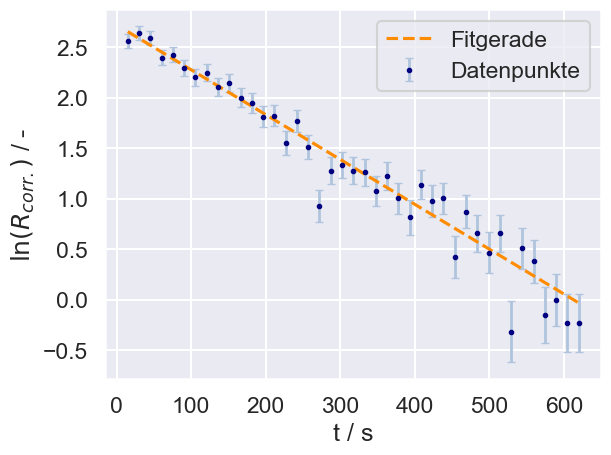

In [28]:
sns.set_theme(style="darkgrid")
sns.set_context("talk")
plt.xlabel("t / s")
plt.ylabel("$\ln(R_{corr.})$ / -")
plt.errorbar(x=data_with_hgs_correction["time / s"] , 
             y=data_with_hgs_correction["log(counting rate corr.) / s$^{-1}$"] , 
             yerr=data_with_hgs_correction["log(counting rate corr. error) / s$^{-1}$"],markersize=6,
             fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Datenpunkte")
plt.plot(data_without_hgs_correction["time / s"], 
         fit_function(data_with_hgs_correction["time / s"] ,p_opt[0],p_opt[1]), "--", color="darkorange", label="Fitgerade")
plt.legend()
#plt.savefig("final_plot_ex3.png", dpi=500,bbox_inches='tight')
plt.show()

### Final remark: I noticed this to late: Of course the logarithm of R is unitless!